Dnes se podíváme na nejjednodušší modely neuoronových sítí, které jsme si ukazovali na přednášce - na perceptron a vícevrstvý perceptron. 

# Perceptron

Implementace perceptronového algoritmu je jednoduchá - parametry perceptronu jsou jen jeden vektor a adaptační pravidlo je také snadné. Implementaci uděláme jako třídu, která má interface inspirovaný populární knihovnou scikit-learn, tj. parametry se nastaví v konstruktoru a třída potom má dvě metody - `fit(X, y)` a `predict(X)`.

V metodách využíváme maticového zápisu - vážený součet píšeme jako skalární součin. To v kombinaci s použitím knihovny `numpy` výrazně zjednodušuje implementaci a navíc je algoritmus rychlejší.

In [14]:
import numpy as np

class Perceptron:
    
    def __init__(self, lr, max_iter=100):
        self.lr = lr
        self.max_iter = max_iter
        
    def fit(self, train_X, train_y):
        train_x = np.array(train_X)
        train_x = self._add_ones(train_x)
        self.w_ = np.zeros(train_x.shape[1])
        
        for _ in range(self.max_iter):
            for x,y in zip(train_x, train_y):
                y_hat = (np.sign(np.dot(x, self.w_.T)) + 1)/2 # tady nemuzeme pouzit predict, pridala by znovu 1
                self.w_ = self.w_ + self.lr*(y - y_hat)*x
        
    def predict(self, X):
        x = np.array(X)
        x = self._add_ones(x)
        return (np.sign(np.dot(x, self.w_.T)) + 1)/2 # signum je -1 nebo 1 -> prevedeme na 0 nebo 1
    
    def _add_ones(self, x): # pridame sloupecek jednicek misto biasu
        ones = np.ones(shape=(x.shape[0],1))
        x = np.append(ones,x, axis=1)        
        return x

Pro otestování si vygenerujeme data. Použijeme generátory jednoduchých dat z knihovny scikit-learn. A vytvoříme data se dvěma třídami. Všimněte si rozdílných výsledků pokud jsou třídy separabilní a pokud ne.

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

# jednoducha metoda na zobrazeni rozhodovaci hranice
def draw_boundary(model, X, y):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12,8))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.show()

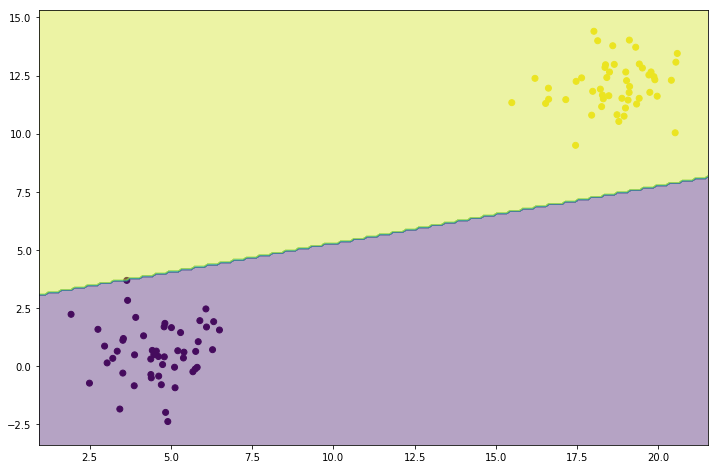

In [100]:
from sklearn import datasets

X, y = datasets.make_blobs(centers=2)

X += (10,10)

perc = Perceptron(0.9, 100)
perc.fit(X, y)
draw_boundary(perc, X, y)

# Vícevrstvý perceptron

Implementace vícevrstvé neuronové sítě je podobně jednoduchá jako u perceptronu, jen je potřeba si zopakovat, jakým způsobem vypadají adaptační pravidla. Použijeme opět maticový zápis.



In [64]:
class MLP:
    
    def __init__(self, layer_sizes, alpha=0.9):
        self.layer_sizes = layer_sizes
        self.layers = []
        self.alpha = alpha
        
        for (p, n) in zip(self.layer_sizes, self.layer_sizes[1:]):
            self.layers.append(np.random.normal(size=(p+1, n)))
        
    def predict(self, X):
        activations = np.array(X)
        try:
            for layer in self.layers:
                activations_1 = self._add_ones(activations) # pridame 1 pro bias
                activations = 1/(1+np.exp(np.dot(activations_1, layer)))
        except Exception as e:
            print("Activations:", activations)
            raise e

        return activations
    
    def fit(self, X, y):
        pass
        # zkuste dopsat sami :)
        
    def _add_ones(self, x): # pridame sloupecek jednicek misto biasu
        ones = np.ones(shape=(x.shape[0],1))
        x = np.append(ones,x, axis=1)        
        return x

In [70]:
mlp = MLP([3,5,2])

mlp.predict(np.array([[1,2,3], [1,2,7]]))

array([[0.7117962 , 0.29673482],
       [0.62745777, 0.24164695]])

# Stručný úvod do tensorflow

Pro implementaci neuronových sítí se dnes používají moderní knihovny jako např. tensorflow. Dnes si jen ukážeme, jak použít tzv. keras interface pro vytvoření a natrénování jednoduché dopředné sítě.

In [104]:
# napred si pripravime data 

x, y = datasets.make_blobs(n_samples=300, centers=3)

idx = list(range(x.shape[0]))
np.random.shuffle(idx)
           
x_train = x[:250]
y_train = y[:250]

import tensorflow as tf

# nastavime architekture site
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
]
)

# nastavime optimalizaci
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# natrenujeme sit
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
250/250 [==============================] - 0s 724us/sample - loss: 0.9856 - acc: 0.5720
Epoch 2/200
250/250 [==============================] - 0s 56us/sample - loss: 0.9596 - acc: 0.6480
Epoch 3/200
250/250 [==============================] - 0s 52us/sample - loss: 0.9370 - acc: 0.6560
Epoch 4/200
250/250 [==============================] - 0s 58us/sample - loss: 0.9151 - acc: 0.6520
Epoch 5/200
250/250 [==============================] - 0s 56us/sample - loss: 0.8962 - acc: 0.6520
Epoch 6/200
250/250 [==============================] - 0s 60us/sample - loss: 0.8778 - acc: 0.6480
Epoch 7/200
250/250 [==============================] - 0s 58us/sample - loss: 0.8613 - acc: 0.6520
Epoch 8/200
250/250 [==============================] - 0s 54us/sample - loss: 0.8459 - acc: 0.6520
Epoch 9/200
250/250 [==============================] - 0s 58us/sample - loss: 0.8330 - acc: 0.6600
Epoch 10/200
250/250 [==============================] - 0s 58us/sample - loss: 0.8215 - acc: 0.6640
Epoch 11

250/250 [==============================] - 0s 30us/sample - loss: 0.5084 - acc: 0.9080
Epoch 83/200
250/250 [==============================] - 0s 42us/sample - loss: 0.5017 - acc: 0.9080
Epoch 84/200
250/250 [==============================] - 0s 40us/sample - loss: 0.4954 - acc: 0.9240
Epoch 85/200
250/250 [==============================] - 0s 32us/sample - loss: 0.4887 - acc: 0.9240
Epoch 86/200
250/250 [==============================] - 0s 52us/sample - loss: 0.4814 - acc: 0.9320
Epoch 87/200
250/250 [==============================] - 0s 32us/sample - loss: 0.4736 - acc: 0.9440
Epoch 88/200
250/250 [==============================] - 0s 48us/sample - loss: 0.4658 - acc: 0.9520
Epoch 89/200
250/250 [==============================] - 0s 48us/sample - loss: 0.4576 - acc: 0.9520
Epoch 90/200
250/250 [==============================] - 0s 44us/sample - loss: 0.4492 - acc: 0.9640
Epoch 91/200
250/250 [==============================] - 0s 50us/sample - loss: 0.4403 - acc: 0.9640
Epoch 92/200


250/250 [==============================] - 0s 36us/sample - loss: 0.1882 - acc: 0.9800
Epoch 164/200
250/250 [==============================] - 0s 34us/sample - loss: 0.1870 - acc: 0.9800
Epoch 165/200
250/250 [==============================] - 0s 52us/sample - loss: 0.1855 - acc: 0.9800
Epoch 166/200
250/250 [==============================] - 0s 40us/sample - loss: 0.1841 - acc: 0.9800
Epoch 167/200
250/250 [==============================] - 0s 32us/sample - loss: 0.1830 - acc: 0.9800
Epoch 168/200
250/250 [==============================] - 0s 44us/sample - loss: 0.1816 - acc: 0.9800
Epoch 169/200
250/250 [==============================] - 0s 54us/sample - loss: 0.1802 - acc: 0.9800
Epoch 170/200
250/250 [==============================] - 0s 52us/sample - loss: 0.1791 - acc: 0.9800
Epoch 171/200
250/250 [==============================] - 0s 54us/sample - loss: 0.1778 - acc: 0.9800
Epoch 172/200
250/250 [==============================] - 0s 50us/sample - loss: 0.1767 - acc: 0.9800
Epoc